In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [2]:
data = './mail_data.csv'
df = pd.read_csv(data)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Repllace null values with null string
mail_data = df.where((pd.notnull(df)),'')

In [4]:
#Label spam as 0 and ham as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [5]:
#Seperate the data as text and labels
X = mail_data['Message']
Y = mail_data['Category']

In [6]:
# Ensure Y is a Pandas Series of integers
Y = pd.Series(Y).astype(int)

In [7]:
# Print the shapes of X and Y
print(f"Shape of X:{X.shape}" )
print(f"Shape of Y:{Y.shape}" )

Shape of X:(5572,)
Shape of Y:(5572,)


In [36]:
# Define the different test sizes for each split (80-20, 70-30, 60-40)
split_ratios = [0.2, 0.3, 0.4] 
# Create lists to store metrics for each split
split_names = ['80-20', '70-30', '60-40']
model = []


Evaluating SVM for 80-20 train-test split

SVM - Accuracy: 97.94%, Precision: 0.98, Recall: 1.00, F1 Score: 0.99
Confusion Matrix:
[[132  23]
 [  0 960]]



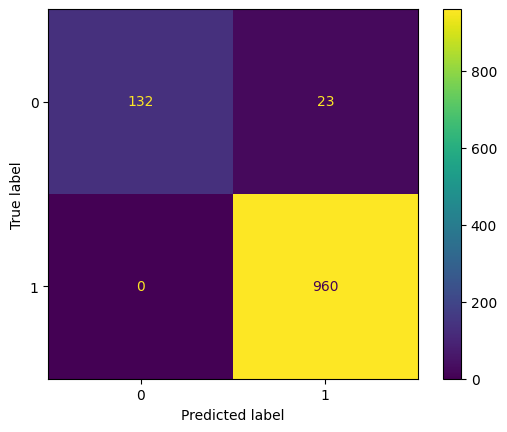


Evaluating SVM for 70-30 train-test split

SVM - Accuracy: 97.79%, Precision: 0.97, Recall: 1.00, F1 Score: 0.99
Confusion Matrix:
[[ 195   37]
 [   0 1440]]



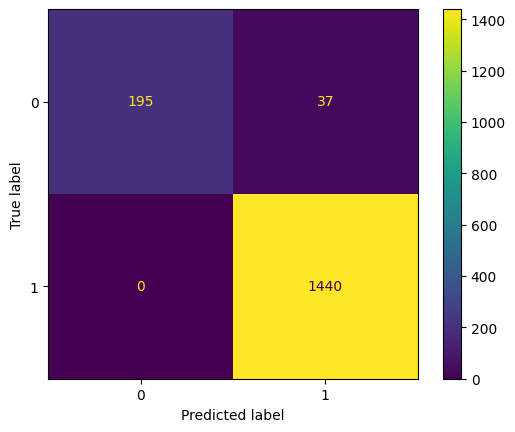


Evaluating SVM for 60-40 train-test split

SVM - Accuracy: 97.44%, Precision: 0.97, Recall: 1.00, F1 Score: 0.99
Confusion Matrix:
[[ 244   52]
 [   5 1928]]



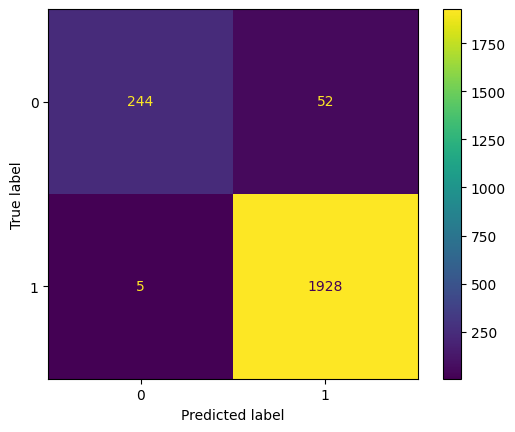

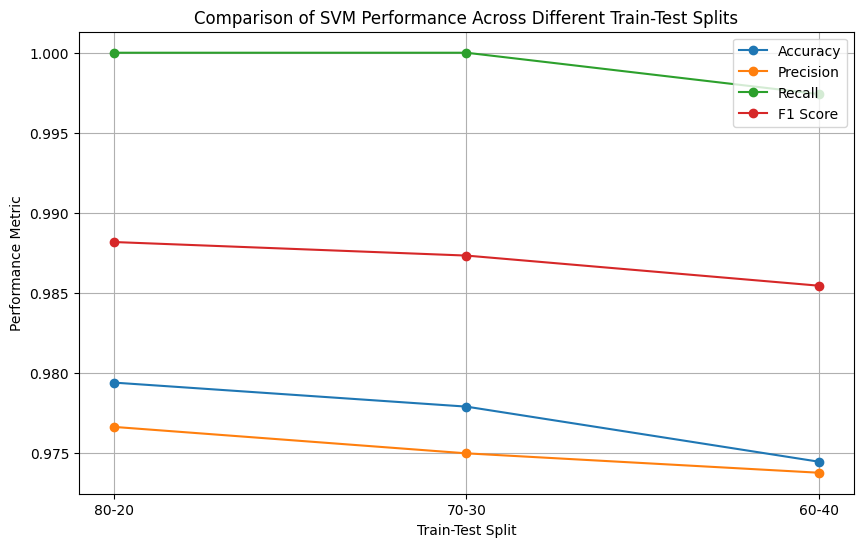

In [37]:
model_name = "SVM"  
classifier = SVC()

svm_accuracy_scores, svm_precision_scores, svm_recall_scores, svm_f1_scores = [], [], [], []

# Loop over each split ratio
for test_size in split_ratios:
    print(f"\nEvaluating {model_name} for {int((1-test_size)*100)}-{int(test_size*100)} train-test split\n")

    # Split the data into training and testing sets for the current test_size
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=3)

    # Transform the text data to feature vectors that can be used for ML
    vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

    # Fitting the vectorizer on training data and transforming both train and test sets
    X_train_features = vectorizer.fit_transform(X_train)
    X_test_features = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_features, Y_train)

    # Predict on test set
    Y_pred = classifier.predict(X_test_features)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Append the metrics to respective lists
    svm_accuracy_scores.append(accuracy)
    svm_precision_scores.append(precision)
    svm_recall_scores.append(recall)
    svm_f1_scores.append(f1)

    # Print the confusion matrix and results for the current split
    print(f"{model_name} - Accuracy: {accuracy*100:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred)}\n")
    # Plot the confusion matrix
    ConfusionMatrixDisplay.from_estimator(classifier, X_test_features, Y_test)
    plt.show()

# Create a DataFrame to hold the values for plotting
metrics_df = pd.DataFrame({
    'Model': [model_name]*len(split_names),
    'Split': split_names,
    'Accuracy': svm_accuracy_scores,
    'Precision': svm_precision_scores,
    'Recall': svm_recall_scores,
    'F1 Score': svm_f1_scores
})


# Plotting the results across different train-test splits for the selected model
plt.figure(figsize=(10, 6))

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.plot(metrics_df['Split'], metrics_df[metric], marker='o', label=metric)

plt.title(f'Comparison of {model_name} Performance Across Different Train-Test Splits')
plt.xlabel('Train-Test Split')
plt.ylabel('Performance Metric')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Evaluating Decision Tree Classifier for 80-20 train-test split

Decision Tree Classifier - Accuracy: 96.59%, Precision: 0.97, Recall: 1.00, F1 Score: 0.98
Confusion Matrix:
[[121  34]
 [  4 956]]



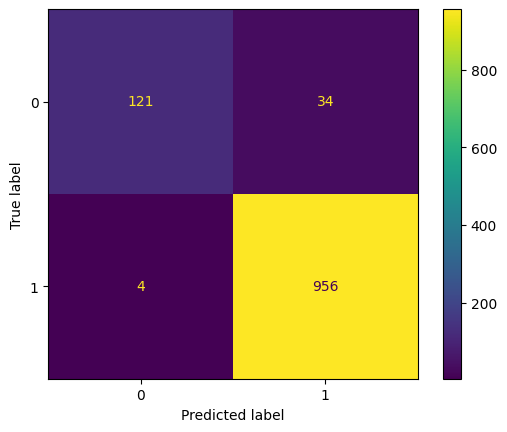


Evaluating Decision Tree Classifier for 70-30 train-test split

Decision Tree Classifier - Accuracy: 96.83%, Precision: 0.97, Recall: 0.99, F1 Score: 0.98
Confusion Matrix:
[[ 188   44]
 [   9 1431]]



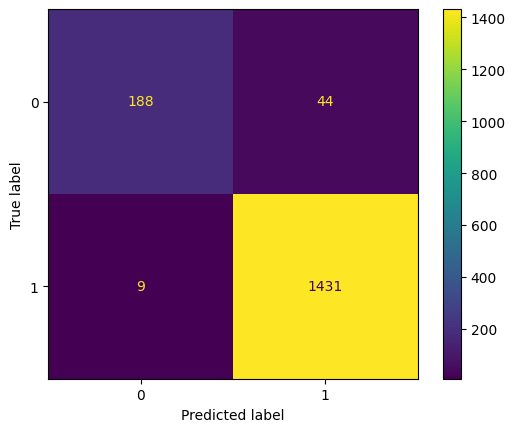


Evaluating Decision Tree Classifier for 60-40 train-test split

Decision Tree Classifier - Accuracy: 96.01%, Precision: 0.97, Recall: 0.98, F1 Score: 0.98
Confusion Matrix:
[[ 240   56]
 [  33 1900]]



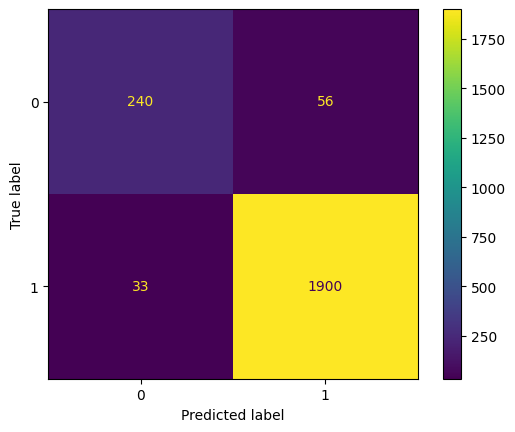

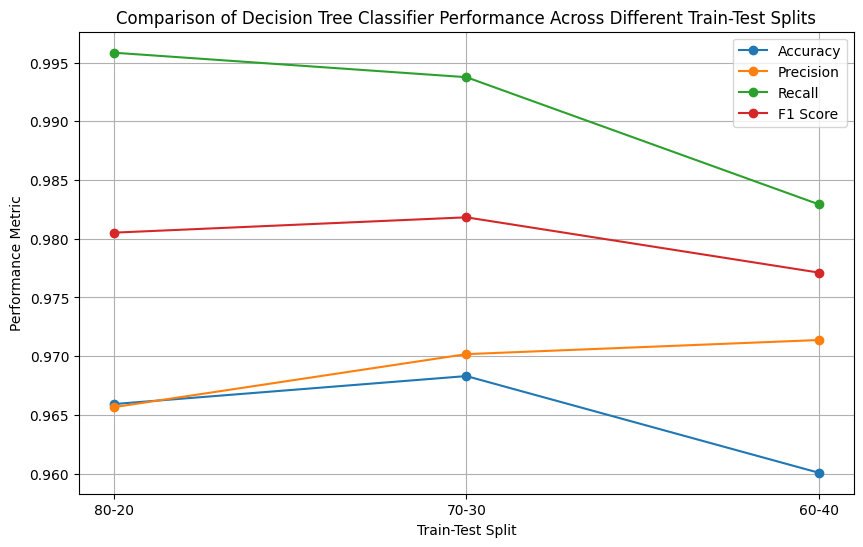

In [38]:
model_name = "Decision Tree Classifier"  
classifier = DecisionTreeClassifier()

dt_accuracy_scores, dt_precision_scores, dt_recall_scores, dt_f1_scores = [], [], [], []

# Loop over each split ratio
for test_size in split_ratios:
    print(f"\nEvaluating {model_name} for {int((1-test_size)*100)}-{int(test_size*100)} train-test split\n")

    # Split the data into training and testing sets for the current test_size
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=3)

    # Transform the text data to feature vectors that can be used for ML
    vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

    # Fitting the vectorizer on training data and transforming both train and test sets
    X_train_features = vectorizer.fit_transform(X_train)
    X_test_features = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_features, Y_train)

    # Predict on test set
    Y_pred = classifier.predict(X_test_features)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Append the metrics to respective lists
    dt_accuracy_scores.append(accuracy)
    dt_precision_scores.append(precision)
    dt_recall_scores.append(recall)
    dt_f1_scores.append(f1)

    # Print the confusion matrix and results for the current split
    print(f"{model_name} - Accuracy: {accuracy*100:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred)}\n")
    # Plot the confusion matrix
    ConfusionMatrixDisplay.from_estimator(classifier, X_test_features, Y_test)
    plt.show()

# Create a DataFrame to hold the values for plotting
metrics_df = pd.DataFrame({
    'Model': [model_name]*len(split_names),
    'Split': split_names,
    'Accuracy': dt_accuracy_scores,
    'Precision': dt_precision_scores,
    'Recall': dt_recall_scores,
    'F1 Score': dt_f1_scores
})

# Plotting the results across different train-test splits for the selected model
plt.figure(figsize=(10, 6))

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.plot(metrics_df['Split'], metrics_df[metric], marker='o', label=metric)

plt.title(f'Comparison of {model_name} Performance Across Different Train-Test Splits')
plt.xlabel('Train-Test Split')
plt.ylabel('Performance Metric')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Evaluating Random Forest Classifier for 80-20 train-test split

Random Forest Classifier - Accuracy: 97.49%, Precision: 0.97, Recall: 1.00, F1 Score: 0.99
Confusion Matrix:
[[127  28]
 [  0 960]]



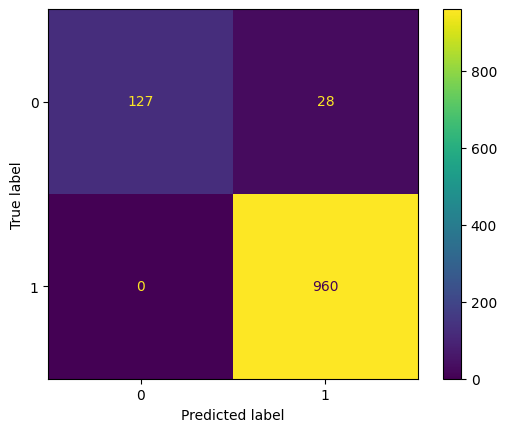


Evaluating Random Forest Classifier for 70-30 train-test split

Random Forest Classifier - Accuracy: 97.61%, Precision: 0.97, Recall: 1.00, F1 Score: 0.99
Confusion Matrix:
[[ 192   40]
 [   0 1440]]



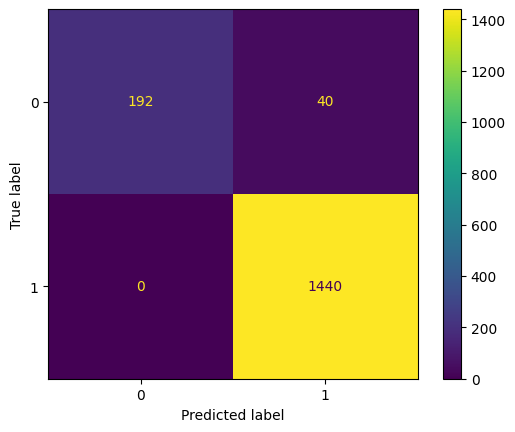


Evaluating Random Forest Classifier for 60-40 train-test split

Random Forest Classifier - Accuracy: 97.35%, Precision: 0.97, Recall: 1.00, F1 Score: 0.98
Confusion Matrix:
[[ 240   56]
 [   3 1930]]



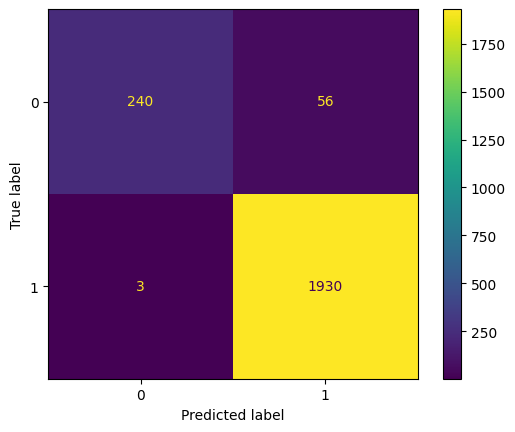

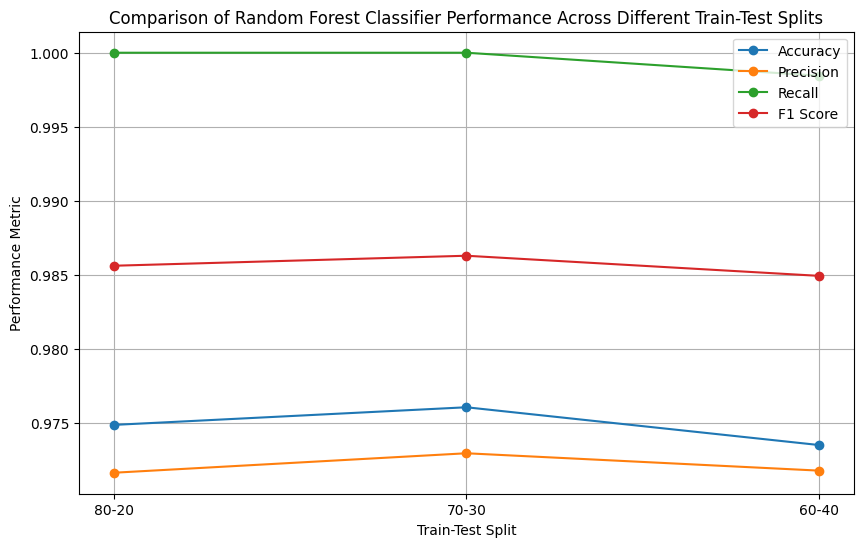

In [40]:
model_name = "Random Forest Classifier"  
classifier = RandomForestClassifier()

rf_accuracy_scores, rf_precision_scores, rf_recall_scores, rf_f1_scores = [], [], [], []

# Loop over each split ratio
for test_size in split_ratios:
    print(f"\nEvaluating {model_name} for {int((1-test_size)*100)}-{int(test_size*100)} train-test split\n")

    # Split the data into training and testing sets for the current test_size
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=3)

    # Transform the text data to feature vectors that can be used for ML
    vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

    # Fitting the vectorizer on training data and transforming both train and test sets
    X_train_features = vectorizer.fit_transform(X_train)
    X_test_features = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_features, Y_train)

    # Predict on test set
    Y_pred = classifier.predict(X_test_features)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Append the metrics to respective lists
    rf_accuracy_scores.append(accuracy)
    rf_precision_scores.append(precision)
    rf_recall_scores.append(recall)
    rf_f1_scores.append(f1)

    # Print the confusion matrix and results for the current split
    print(f"{model_name} - Accuracy: {accuracy*100:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred)}\n")
    # Plot the confusion matrix
    ConfusionMatrixDisplay.from_estimator(classifier, X_test_features, Y_test)
    plt.show()

# Create a DataFrame to hold the values for plotting
metrics_df = pd.DataFrame({
    'Model': [model_name]*len(split_names),
    'Split': split_names,
    'Accuracy': rf_accuracy_scores,
    'Precision': rf_precision_scores,
    'Recall': rf_recall_scores,
    'F1 Score': rf_f1_scores
})

# Plotting the results across different train-test splits for the selected model
plt.figure(figsize=(10, 6))

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.plot(metrics_df['Split'], metrics_df[metric], marker='o', label=metric)

plt.title(f'Comparison of {model_name} Performance Across Different Train-Test Splits')
plt.xlabel('Train-Test Split')
plt.ylabel('Performance Metric')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Evaluating Adaboost Classifier for 80-20 train-test split



c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost Classifier - Accuracy: 96.59%, Precision: 0.97, Recall: 1.00, F1 Score: 0.98
Confusion Matrix:
[[121  34]
 [  4 956]]



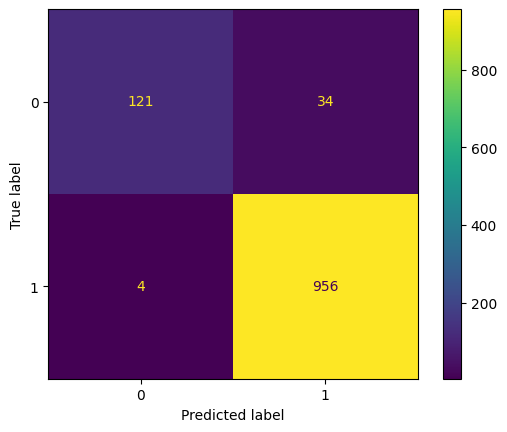


Evaluating Adaboost Classifier for 70-30 train-test split



c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost Classifier - Accuracy: 96.47%, Precision: 0.97, Recall: 0.99, F1 Score: 0.98
Confusion Matrix:
[[ 188   44]
 [  15 1425]]



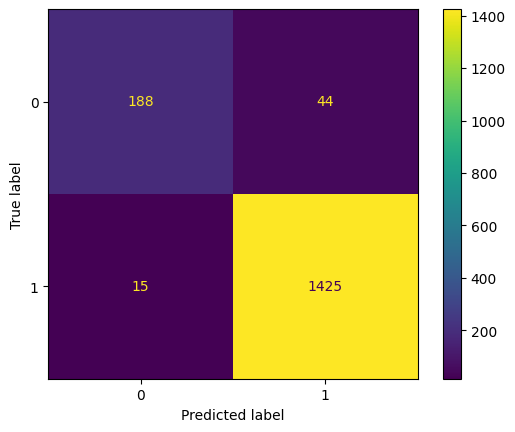


Evaluating Adaboost Classifier for 60-40 train-test split



c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost Classifier - Accuracy: 96.28%, Precision: 0.96, Recall: 0.99, F1 Score: 0.98
Confusion Matrix:
[[ 223   73]
 [  10 1923]]



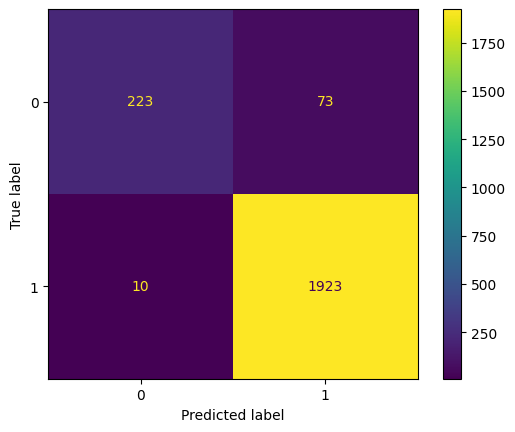

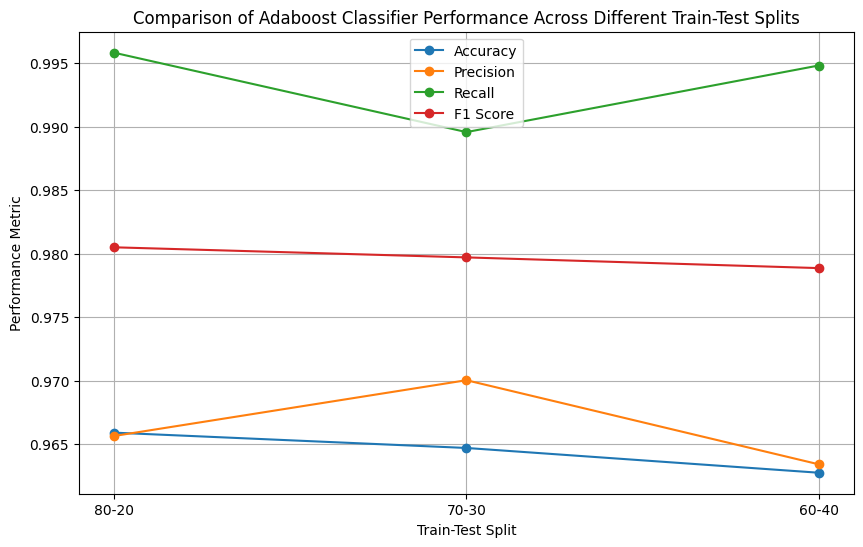

In [41]:
model_name = "Adaboost Classifier"  
classifier = AdaBoostClassifier()

ab_accuracy_scores, ab_precision_scores, ab_recall_scores, ab_f1_scores = [], [], [], []

# Loop over each split ratio
for test_size in split_ratios:
    print(f"\nEvaluating {model_name} for {int((1-test_size)*100)}-{int(test_size*100)} train-test split\n")

    # Split the data into training and testing sets for the current test_size
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=3)

    # Transform the text data to feature vectors that can be used for ML
    vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

    # Fitting the vectorizer on training data and transforming both train and test sets
    X_train_features = vectorizer.fit_transform(X_train)
    X_test_features = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_features, Y_train)

    # Predict on test set
    Y_pred = classifier.predict(X_test_features)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Append the metrics to respective lists
    ab_accuracy_scores.append(accuracy)
    ab_precision_scores.append(precision)
    ab_recall_scores.append(recall)
    ab_f1_scores.append(f1)

    # Print the confusion matrix and results for the current split
    print(f"{model_name} - Accuracy: {accuracy*100:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred)}\n")
    # Plot the confusion matrix
    ConfusionMatrixDisplay.from_estimator(classifier, X_test_features, Y_test)
    plt.show()

# Create a DataFrame to hold the values for plotting
metrics_df = pd.DataFrame({
    'Model': [model_name]*len(split_names),
    'Split': split_names,
    'Accuracy': ab_accuracy_scores,
    'Precision': ab_precision_scores,
    'Recall': ab_recall_scores,
    'F1 Score': ab_f1_scores
})


# Plotting the results across different train-test splits for the selected model
plt.figure(figsize=(10, 6))

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.plot(metrics_df['Split'], metrics_df[metric], marker='o', label=metric)

plt.title(f'Comparison of {model_name} Performance Across Different Train-Test Splits')
plt.xlabel('Train-Test Split')
plt.ylabel('Performance Metric')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Evaluating Naive Bayes Classifier for 80-20 train-test split

Naive Bayes Classifier - Accuracy: 97.31%, Precision: 0.97, Recall: 1.00, F1 Score: 0.98
Confusion Matrix:
[[125  30]
 [  0 960]]



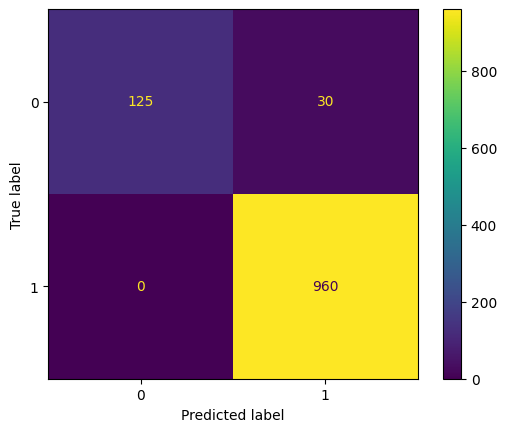


Evaluating Naive Bayes Classifier for 70-30 train-test split

Naive Bayes Classifier - Accuracy: 96.83%, Precision: 0.96, Recall: 1.00, F1 Score: 0.98
Confusion Matrix:
[[ 179   53]
 [   0 1440]]



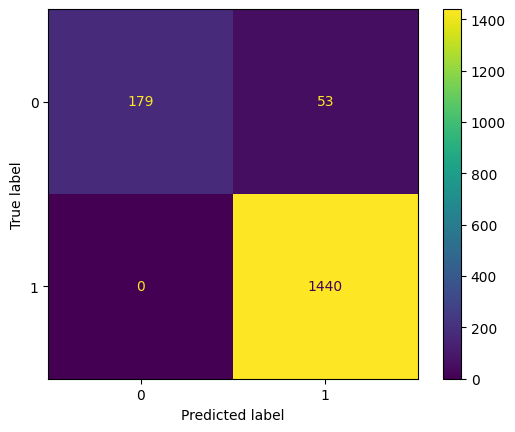


Evaluating Naive Bayes Classifier for 60-40 train-test split

Naive Bayes Classifier - Accuracy: 97.17%, Precision: 0.97, Recall: 1.00, F1 Score: 0.98
Confusion Matrix:
[[ 233   63]
 [   0 1933]]



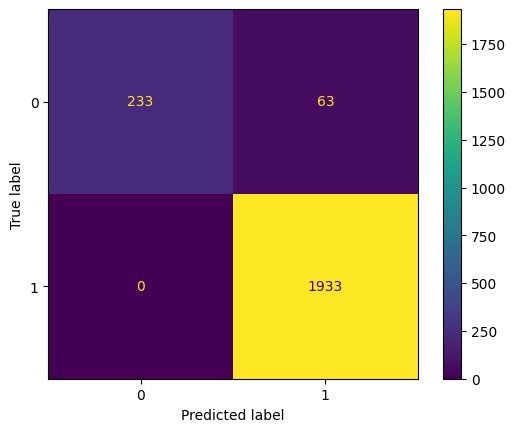

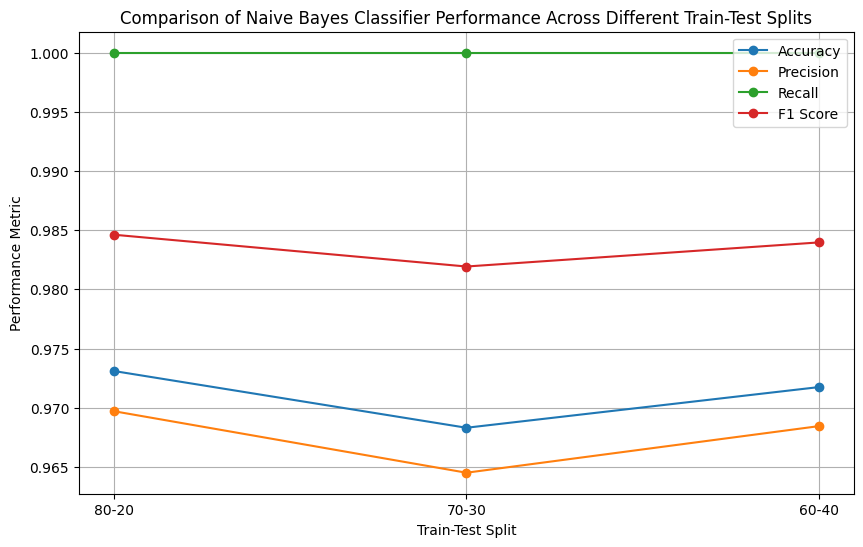

In [43]:
model_name = "Naive Bayes Classifier"  
classifier = MultinomialNB()

nb_accuracy_scores, nb_precision_scores, nb_recall_scores, nb_f1_scores = [], [], [], []

# Loop over each split ratio
for test_size in split_ratios:
    print(f"\nEvaluating {model_name} for {int((1-test_size)*100)}-{int(test_size*100)} train-test split\n")

    # Split the data into training and testing sets for the current test_size
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=3)

    # Transform the text data to feature vectors that can be used for ML
    vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

    # Fitting the vectorizer on training data and transforming both train and test sets
    X_train_features = vectorizer.fit_transform(X_train)
    X_test_features = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_features, Y_train)

    # Predict on test set
    Y_pred = classifier.predict(X_test_features)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Append the metrics to respective lists
    nb_accuracy_scores.append(accuracy)
    nb_precision_scores.append(precision)
    nb_recall_scores.append(recall)
    nb_f1_scores.append(f1)

    # Print the confusion matrix and results for the current split
    print(f"{model_name} - Accuracy: {accuracy*100:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred)}\n")
    # Plot the confusion matrix
    ConfusionMatrixDisplay.from_estimator(classifier, X_test_features, Y_test)
    plt.show()

# Create a DataFrame to hold the values for plotting
metrics_df = pd.DataFrame({
    'Model': [model_name]*len(split_names),
    'Split': split_names,
    'Accuracy': nb_accuracy_scores,
    'Precision': nb_precision_scores,
    'Recall': nb_recall_scores,
    'F1 Score': nb_f1_scores
})

# Plotting the results across different train-test splits for the selected model
plt.figure(figsize=(10, 6))

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.plot(metrics_df['Split'], metrics_df[metric], marker='o', label=metric)

plt.title(f'Comparison of {model_name} Performance Across Different Train-Test Splits')
plt.xlabel('Train-Test Split')
plt.ylabel('Performance Metric')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Evaluating K-Means for 80-20 train-test split

K-Means - Silhouette Score: 0.01, Adjusted Rand Index: 0.48
Cluster Centers:
[[1.70238763e-04 8.89433392e-04 5.95291447e-05 ... 4.64822073e-05
  5.54505243e-05 9.82885756e-05]
 [4.01278619e-03 6.75039590e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


Evaluating K-Means for 70-30 train-test split

K-Means - Silhouette Score: 0.01, Adjusted Rand Index: -0.05
Cluster Centers:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.20440013e-04 1.48385620e-03 6.50522552e-05 ... 5.10306234e-05
  6.08491303e-05 1.07744214e-04]]


Evaluating K-Means for 60-40 train-test split

K-Means - Silhouette Score: 0.01, Adjusted Rand Index: -0.01
Cluster Centers:
[[0.00000000e+00 1.60609506e-03 9.80592251e-05 ... 5.66031406e-05
  0.00000000e+00 1.41920347e-04]
 [1.83258558e-03 1.43940391e-03 0.00000000e+00 ... 0.00000000e+00
  3.68758633e-04 0.00000000e+00]]



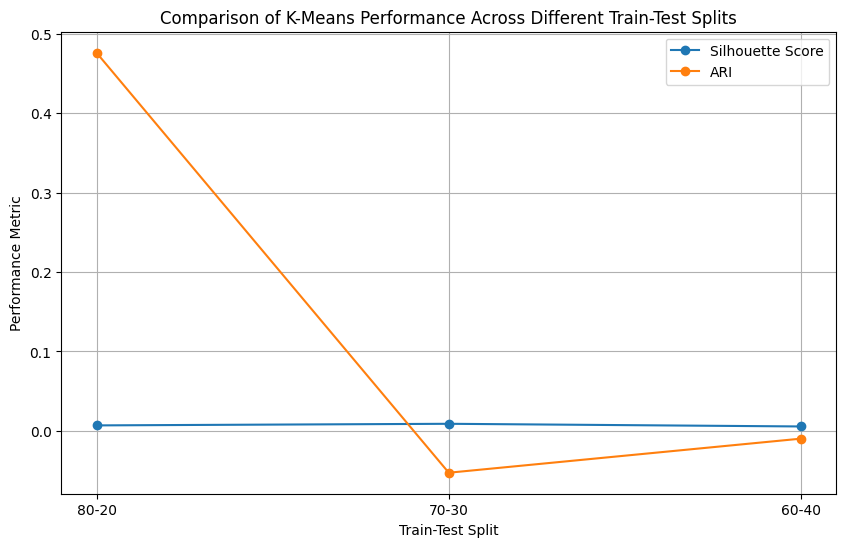

In [44]:
model_name = "K-Means"
classifier = KMeans(n_clusters=2, random_state=3)

kmeans_silhouette_scores, kmeans_ari_scores = [], []

# Loop over each split ratio
for test_size in split_ratios:
    print(f"\nEvaluating {model_name} for {int((1-test_size)*100)}-{int(test_size*100)} train-test split\n")

    # Split the data into training and testing sets for the current test_size
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=3)

    # Transform the text data to feature vectors that can be used for ML
    vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

    # Fitting the vectorizer on training data and transforming both train and test sets
    X_train_features = vectorizer.fit_transform(X_train)
    X_test_features = vectorizer.transform(X_test)

    # Train the KMeans model
    classifier.fit(X_train_features)

    # Predict clusters on the test set
    Y_pred = classifier.predict(X_test_features)

    # Calculate silhouette score (higher is better) and adjusted rand index (ARI)
    silhouette = silhouette_score(X_test_features, Y_pred)
    ari = adjusted_rand_score(Y_test, Y_pred)

    # Append the metrics to respective lists
    kmeans_silhouette_scores.append(silhouette)
    kmeans_ari_scores.append(ari)

    # Print the silhouette score and ARI for the current split
    print(f"{model_name} - Silhouette Score: {silhouette:.2f}, Adjusted Rand Index: {ari:.2f}")
    print(f"Cluster Centers:\n{classifier.cluster_centers_}\n")

# Create a DataFrame to hold the values for plotting
metrics_df = pd.DataFrame({
    'Model': [model_name]*len(split_names),
    'Split': split_names,
    'Silhouette Score': kmeans_silhouette_scores,
    'ARI': kmeans_ari_scores
})

# Plotting the results across different train-test splits for the selected model
plt.figure(figsize=(10, 6))

# Metrics to plot
metrics = ['Silhouette Score', 'ARI']
for metric in metrics:
    plt.plot(metrics_df['Split'], metrics_df[metric], marker='o', label=metric)
plt.title(f'Comparison of {model_name} Performance Across Different Train-Test Splits')
plt.xlabel('Train-Test Split')
plt.ylabel('Performance Metric')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Evaluating Agglomerative Clustering for 80-20 train-test split

Agglomerative Clustering - Silhouette Score: 0.01, Adjusted Rand Index: -0.03

Evaluating Agglomerative Clustering for 70-30 train-test split

Agglomerative Clustering - Silhouette Score: 0.01, Adjusted Rand Index: -0.02

Evaluating Agglomerative Clustering for 60-40 train-test split

Agglomerative Clustering - Silhouette Score: 0.01, Adjusted Rand Index: -0.01


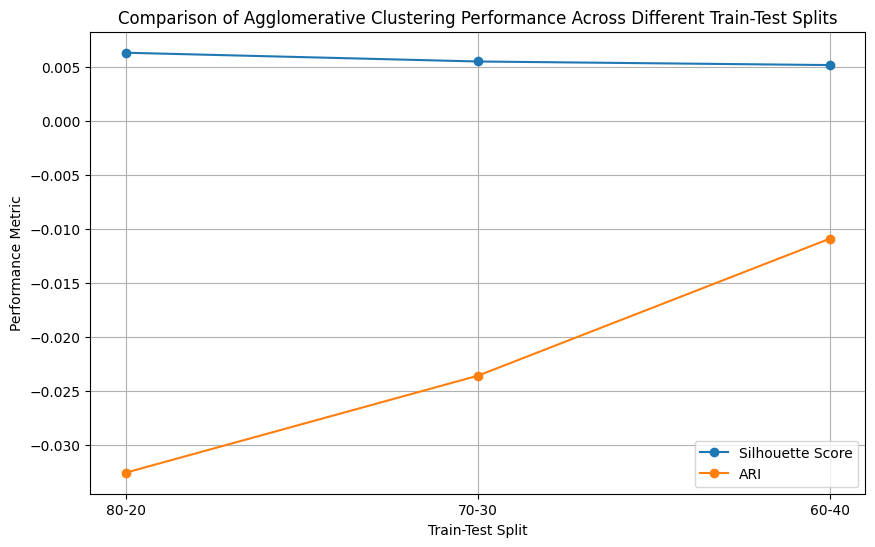

In [48]:
model_name = "Agglomerative Clustering"
classifier = AgglomerativeClustering(n_clusters=2)

agg_silhouette_scores, agg_ari_scores = [], []

# Loop over each split ratio
for test_size in split_ratios:
    print(f"\nEvaluating {model_name} for {int((1-test_size)*100)}-{int(test_size*100)} train-test split\n")

    # Split the data into training and testing sets for the current test_size
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=3)

    # Transform the text data to feature vectors that can be used for ML
    vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

  # Fitting the vectorizer on training data and transforming both train and test sets
    X_train_features = vectorizer.fit_transform(X_train)
    X_test_features = vectorizer.transform(X_test)

    # Convert sparse matrices to dense arrays
    X_train_features_dense = X_train_features.toarray()
    X_test_features_dense = X_test_features.toarray()

    # Fit the Agglomerative Clustering model
    Y_pred = classifier.fit_predict(X_test_features_dense)

    # Calculate silhouette score and adjusted rand index
    silhouette = silhouette_score(X_test_features_dense, Y_pred)
    ari = adjusted_rand_score(Y_test, Y_pred)

    # Append the metrics to respective lists
    agg_silhouette_scores.append(silhouette)
    agg_ari_scores.append(ari)

    # Print the silhouette score and ARI for the current split
    print(f"{model_name} - Silhouette Score: {silhouette:.2f}, Adjusted Rand Index: {ari:.2f}")

# Create a DataFrame to hold the values for plotting
metrics_df = pd.DataFrame({
    'Model': [model_name]*len(split_names),
    'Split': split_names,
    'Silhouette Score': agg_silhouette_scores,
    'ARI': agg_ari_scores
})


# Plotting the results across different train-test splits for the selected model
plt.figure(figsize=(10, 6))

# Metrics to plot
metrics = ['Silhouette Score', 'ARI']
for metric in metrics:
    plt.plot(metrics_df['Split'], metrics_df[metric], marker='o', label=metric)

plt.title(f'Comparison of {model_name} Performance Across Different Train-Test Splits')
plt.xlabel('Train-Test Split')
plt.ylabel('Performance Metric')
plt.legend(loc='best')
plt.grid(True)
plt.show()
